# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import date


from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

today = date.today()
today

datetime.date(2020, 7, 30)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count

len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL

#city = 'Avarua'
units = 'Imperial'
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# print(query_url)
# Test and view the json response to access various data elements
# response = requests.get(query_url + city).json()
# print(response)
# print(json.dumps(response, indent=4))

In [4]:
# Setup a loop to loop through each city in cities and get the relevant weather info + lat and longtitude info
# since all lats and lngs didn't retrieve a city (lists for cities and weather are of a different lengths) so we must handle that via a 
# try/except condition AND build a cities list with only those cities where weather data was successfully retrieved.
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
city_lats = []
city_lngs = []
city_datetime = []
city_country = []


counter = 0
for city in cities:
    
    response = requests.get(query_url + city).json()

    try:
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        city_datetime.append(response['dt'])
        city_country.append(response['sys']['country'])
        city_lats.append(response['coord']['lat'])
        city_lngs.append(response['coord']['lon'])
        
        counter = counter + 1
        print(f"#: {counter}: Retrieving weather data for {city}, city ID:{response['id']}")
    except:    
        print(f"Weather data for {city} not found, skipping.")
        pass
    

#: 1: Retrieving weather data for rawson, city ID:3839307
Weather data for samusu not found, skipping.
#: 2: Retrieving weather data for talnakh, city ID:1490256
#: 3: Retrieving weather data for hami, city ID:1529484
#: 4: Retrieving weather data for dalbandin, city ID:1180729
#: 5: Retrieving weather data for marsaxlokk, city ID:2562247
#: 6: Retrieving weather data for hithadhoo, city ID:1282256
#: 7: Retrieving weather data for faanui, city ID:4034551
#: 8: Retrieving weather data for mahalingpur, city ID:1264457
#: 9: Retrieving weather data for rikitea, city ID:4030556
#: 10: Retrieving weather data for sept-iles, city ID:6144312
#: 11: Retrieving weather data for punta arenas, city ID:3874787
#: 12: Retrieving weather data for pedasi, city ID:3703239
#: 13: Retrieving weather data for ponta do sol, city ID:2264557
#: 14: Retrieving weather data for mataura, city ID:6201424
#: 15: Retrieving weather data for atuona, city ID:4020109
#: 16: Retrieving weather data for deputatskiy, 

#: 124: Retrieving weather data for hit, city ID:95788
#: 125: Retrieving weather data for port augusta, city ID:2063056
#: 126: Retrieving weather data for pedernales, city ID:3495137
#: 127: Retrieving weather data for olafsvik, city ID:3414079
#: 128: Retrieving weather data for pisco, city ID:3932145
Weather data for kamenskoye not found, skipping.
#: 129: Retrieving weather data for bethel, city ID:5282297
#: 130: Retrieving weather data for kahului, city ID:5847411
#: 131: Retrieving weather data for grindavik, city ID:3416888
#: 132: Retrieving weather data for yellowknife, city ID:6185377
#: 133: Retrieving weather data for roald, city ID:3141667
#: 134: Retrieving weather data for kiruna, city ID:605155
Weather data for fort saint john not found, skipping.
#: 135: Retrieving weather data for anadyr, city ID:2127202
#: 136: Retrieving weather data for chino valley, city ID:5289658
Weather data for nizhneyansk not found, skipping.
#: 137: Retrieving weather data for vao, city ID

#: 246: Retrieving weather data for guru har sahai, city ID:1270612
#: 247: Retrieving weather data for haimen, city ID:1809062
#: 248: Retrieving weather data for mirnyy, city ID:2019951
#: 249: Retrieving weather data for sarkand, city ID:1519691
#: 250: Retrieving weather data for port-cartier, city ID:6111696
#: 251: Retrieving weather data for kurayoshi, city ID:1858301
#: 252: Retrieving weather data for matamoros, city ID:3996426
#: 253: Retrieving weather data for nyurba, city ID:2018735
#: 254: Retrieving weather data for ola, city ID:2122574
#: 255: Retrieving weather data for cremona, city ID:3177837
#: 256: Retrieving weather data for muros, city ID:3115824
Weather data for louisbourg not found, skipping.
#: 257: Retrieving weather data for greymouth, city ID:2206895
#: 258: Retrieving weather data for port hardy, city ID:6111862
#: 259: Retrieving weather data for tuy hoa, city ID:1563281
#: 260: Retrieving weather data for pangnirtung, city ID:6096551
#: 261: Retrieving w

#: 372: Retrieving weather data for lukulu, city ID:909488
#: 373: Retrieving weather data for portobelo, city ID:3702577
#: 374: Retrieving weather data for pevek, city ID:2122090
#: 375: Retrieving weather data for malindi, city ID:187968
#: 376: Retrieving weather data for newport beach, city ID:5376890
#: 377: Retrieving weather data for gushi, city ID:1809222
#: 378: Retrieving weather data for iqaluit, city ID:5983720
#: 379: Retrieving weather data for tuatapere, city ID:2180815
#: 380: Retrieving weather data for kaitangata, city ID:2208248
#: 381: Retrieving weather data for langxiang, city ID:2036237
Weather data for tidore not found, skipping.
#: 382: Retrieving weather data for sao joao da barra, city ID:3448903
#: 383: Retrieving weather data for cayenne, city ID:3382160
#: 384: Retrieving weather data for krasnyy chikoy, city ID:2012349
#: 385: Retrieving weather data for chicama, city ID:3698359
#: 386: Retrieving weather data for bubaque, city ID:2374583
#: 387: Retriev

Weather data for paucartambo not found, skipping.
#: 500: Retrieving weather data for wairoa, city ID:2206808
#: 501: Retrieving weather data for byron bay, city ID:2172880
#: 502: Retrieving weather data for sumenep, city ID:1626099
#: 503: Retrieving weather data for sapa, city ID:1687343
#: 504: Retrieving weather data for pontian kecil, city ID:1732711
#: 505: Retrieving weather data for manokwari, city ID:1636308
#: 506: Retrieving weather data for mandalgovi, city ID:2030065
#: 507: Retrieving weather data for zyryanka, city ID:2119283
#: 508: Retrieving weather data for loandjili, city ID:2258378
#: 509: Retrieving weather data for camapua, city ID:3468020
#: 510: Retrieving weather data for santa cruz, city ID:3904906
#: 511: Retrieving weather data for soyo, city ID:2236967
#: 512: Retrieving weather data for gopalur, city ID:1270952
#: 513: Retrieving weather data for hobyo, city ID:57000
#: 514: Retrieving weather data for kazachinskoye, city ID:1504075
#: 515: Retrieving we

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictionary of the lists to combine all the collected data into a single dataframe.
cities_dict ={
    "City": city_name,
    "Latitude": city_lats,
    "Longtitude": city_lngs,
    "Max Temperature": max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Time of Data": city_datetime,
    "Country Code" : city_country
}
# Create the initial dataframe from the above dictionary.
cities_df = pd.DataFrame(cities_dict)
cities_df.head()

,City,Latitude,Longtitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Time of Data,Country Code
0,Rawson,-43.30,-65.10,46.27,54,100,11.25,1596152680,AR
1,Talnakh,69.49,88.40,64.40,63,70,13.42,1596152834,RU
2,Kumul,42.80,93.45,72.52,31,0,15.35,1596152834,CN
3,Dalbandin,28.89,64.41,81.45,24,0,6.46,1596152834,PK
4,Marsaxlokk,35.84,14.54,82.00,74,0,2.24,1596152834,MT


In [6]:
cities_df.to_csv("../Resources/cities_weather_data.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%. if there are then filter them out.
filt=(cities_df['Humidity'] > 100)

if cities_df['Humidity'].max() > 100:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# ~ returns the inverse of the filter condition.
    clean_city_data = cities_df[~filt]
else:
    clean_city_data = cities_df

clean_city_data.shape
    

(565, 9)

In [8]:
# Export the City_Data into a csv
clean_city_data.to_csv("../Resources/clean_city_weather_data.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

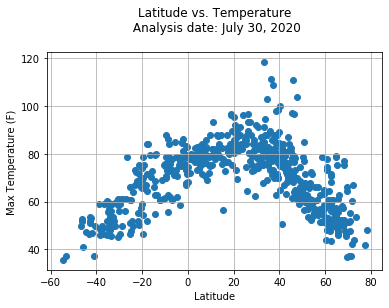

In [29]:
analysis_date = today.strftime("%B %d, %Y")
plt.scatter(clean_city_data['Latitude'],clean_city_data['Max Temperature'])

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Latitude vs. Temperature\n Analysis date: {analysis_date}\n")
plt.grid(True)

# Save the plot to the png folder
plt.savefig("../plots/latitude_vs_temp.png")
#plt.savefig("latitude_vs_temp.png")

# Show the plot
plt.show()


> The Latitude vs Temperature plot shows an increase in temperature for cities closer to the equator and more <br>
> specifically cities that fall between 20 and 40 degrees north of the equator have the highest temperaures.

## Latitude vs. Humidity Plot

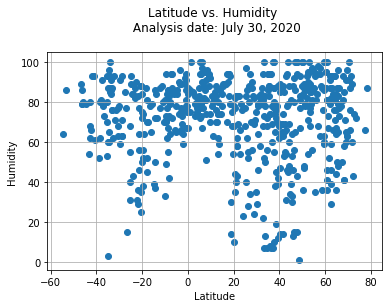

In [30]:
analysis_date = today.strftime("%B %d, %Y")
plt.scatter(clean_city_data['Latitude'],clean_city_data['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Latitude vs. Humidity \n Analysis date: {analysis_date}\n")
plt.grid(True)

# Save the plot to the png folder
plt.savefig("../plots/latitude_vs_humidity.png")

# Show the plot
plt.show()

> The Latitude vs Humidity plot shows a broad range of humidity values (from low to high) across all latitudes, with <br>
> a higher concentration of greater humidity vs lower humidity.

## Latitude vs. Cloudiness Plot

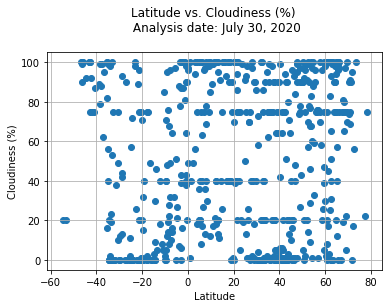

In [31]:
analysis_date = today.strftime("%B %d, %Y")
plt.scatter(clean_city_data['Latitude'],clean_city_data['Cloudiness'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Latitude vs. Cloudiness (%) \n Analysis date: {analysis_date}\n")
plt.grid(True)

# Save the plot to the png folder
plt.savefig("../plots/latitude_vs_cloudiness.png")

# Show the plot
plt.show()

> The Latitude vs Cloudiness plot shows a broad variation of cloudiness across all latitudes with concentrations of 100% and 0% > cloudiness across latitudes spanning from -40 to 70.

## Latitude vs. Wind Speed Plot

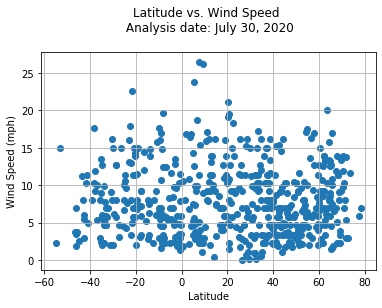

In [32]:
analysis_date = today.strftime("%B %d, %Y")
plt.scatter(clean_city_data['Latitude'],clean_city_data['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Latitude vs. Wind Speed \n Analysis date: {analysis_date}\n")
plt.grid(True)

# Save the plot to the png folder
plt.savefig("../plots/latitude_vs_wind_speed.png")

# Show the plot
plt.show()

> The Latitude vs Wind Speed plot shows a high concentration of cities with low wind speeds (under 10 Mph) across the <br>
> range of latitudes from -45 to 80.

## Linear Regression

In [33]:
# OPTIONAL: Create a function to create Linear Regression plots

In [34]:
# Create Northern and Southern Hemisphere DataFrames
northern_filt = (clean_city_data['Latitude'] >= 0)
northern_df = clean_city_data[northern_filt]
print(northern_df.shape)
southern_filt = (clean_city_data['Latitude'] < 0)
southern_df = clean_city_data[southern_filt]
print(southern_df.shape)

(392, 9)
(173, 9)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.44097334805948346


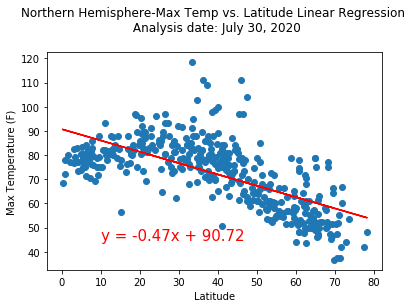

In [35]:
# Setup data and labels for the plot
x_values = northern_df['Latitude']
y_values = northern_df['Max Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Northern Hemisphere-Max Temp vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,45),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/northern_max_temp_vs_lat_linear_regression.png")

# Show the plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6431620503064144


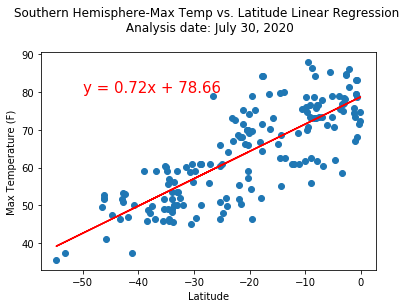

In [36]:
# Setup data and labels for the plot
x_values = southern_df['Latitude']
y_values = southern_df['Max Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Southern Hemisphere-Max Temp vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/southern_max_temp_vs_lat_linear_regression.png")

# Show the plot
plt.show()

> In the southern hemisphere there is moderate coorelation between max temperatures increasing as latitudes get closer to <br> > the equator.  In the northern hemisphere, a similar trend appears to be true however the correlation, correlation  <br>
> coefficient indicates a weak to moderate correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0009457601514965555


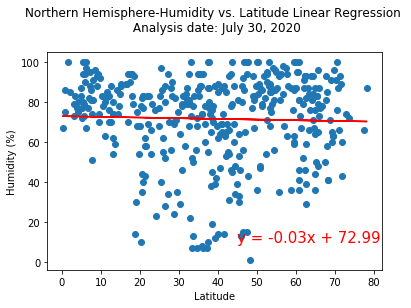

In [37]:
# Setup data and labels for the plot
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Northern Hemisphere-Humidity vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/northern_humidity_vs_lat_linear_regression.png")

# Show the plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0017624081076942973


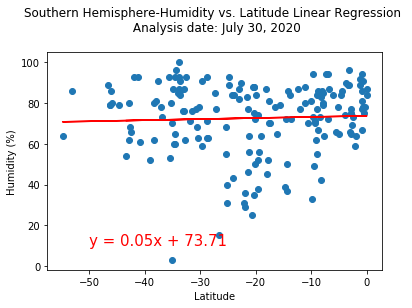

In [38]:
# Setup data and labels for the plot
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Southern Hemisphere-Humidity vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/southern_humidity_vs_lat_linear_regression.png")

# Show the plot
plt.show()

> There is no correlation between Humidity and Latitude in either the northern or southern hemispheres. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0022290188462092985


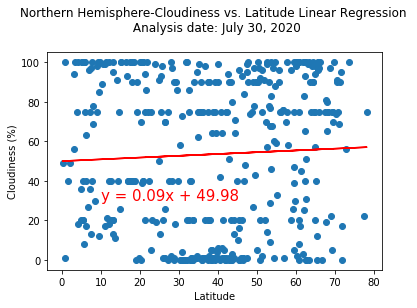

In [39]:
# Setup data and labels for the plot
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Northern Hemisphere-Cloudiness vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/northern_cloudiness_vs_lat_linear_regression.png")

# Show the plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013140803629770992


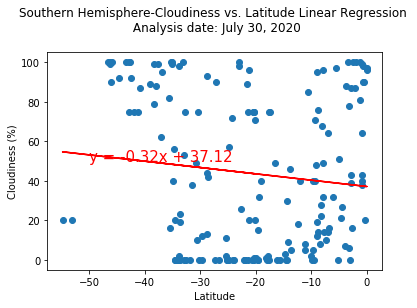

In [40]:
# Setup data and labels for the plot
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Southern Hemisphere-Cloudiness vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/southern_cloudiness_vs_lat_linear_regression.png")

# Show the plot
plt.show()

> There is no correlation between Cloudiness and Latitude in either the northern or southern hemispheres. Cloudiness <br>
> varies from 0% to 100% across the range of observed latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004710330021665855


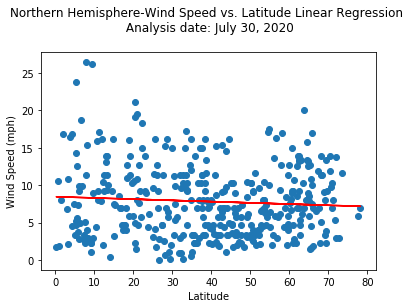

In [41]:
# Setup data and labels for the plot
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Northern Hemisphere-Wind Speed vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/northern_windspeed_vs_lat_linear_regression.png")

# Show the plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0012551893916446723


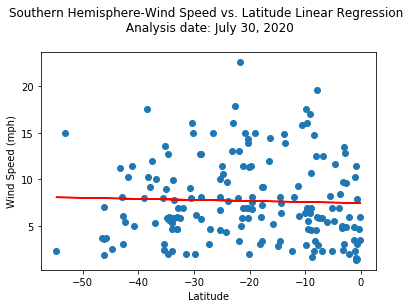

In [42]:
# Setup data and labels for the plot
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Southern Hemisphere-Wind Speed vs. Latitude Linear Regression \n Analysis date: {analysis_date}\n")

# Linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Print the linear regression r-squared value
print(f"The r-squared is: {rvalue**2}")

# Save the plot to the png folder
plt.savefig("../plots/southern_windspeed_vs_lat_linear_regression.png")

# Show the plot
plt.show()



> There is no correlation between Wind Speed and Latitude in either the northern or southern hemispheres.<br>
> There are a higher number of cities with low Wind speeds across the range of latitudes in the northern hemisphere  <br> 
> ranging from the equator to 70 degrees north.  In the southern hemisphere, there are fewer data points, <br> 
> (than in the northern hemisphere) however there is a similar concentration of lower wind speeds (10mph) from <br>
> the equator to approximately -46 south.